## Logan Stout
<p>I am a hobby chess player having started playing during 2020. I have a soild understanding of how to play the game at a medium level and a decent grasp on the basic methods underpinning skilled chess strategies, but my gameplay still exhibits several severe shortcomings. By being aware of these weaknesses, I can easily judge a terrible move from an acceptable one with at least some foresight. As such, a basic chess engine or move evaluation is well within the realm of capability. As well, I'm hoping to gain experience with presenting data in a useful and satisfying/interactive format, preferably with an interface or application similar to Tableau. </p>

### Jacob Linder
<p>At this point I have gained extensive experience with Python, and am comfortable generating graphs, tables, and analysis utilizing its various packages. I have a small amount of experience with Plotly and Dash, which may help towards our ultimate dashboard goal. With help from Logan's chess experience we plan to create a meaningful Lichess and chess master dashboard, complete with graphs, tables, and explanations. </p>

## What will this analysis do?
These analyses will evaluate chess moves using various metrics to distinguish appropriate or ideal scenarios in which to use these moves based on factors such as rating or time control.

## Who might be interested?
Chess players of all ratings would be able to take advantage of these data to improve their chances of winning.

## Data examples
Some example data from February 2013 is shown below. The data is downloaded directly from the Lichess database, which saves their games in monthly files. The file is read in using the python-chess package, and saved iteratively in a list. When the pg.read_game function hits the end of the file, it will return None.

In [1]:
import chess.pgn

In [2]:
games = []
pgn = open('data/lichess_db_standard_rated_2013-02.pgn', 'r')
game = chess.pgn.read_game(pgn)
while game != None:
    games.append(game)
    game = chess.pgn.read_game(pgn)

In [3]:
print(games[1].headers)

Headers(Event='Rated Blitz game', Site='https://lichess.org/b9tstv2z', Date='????.??.??', Round='?', White='dvorak', Black='Kiriush', Result='1-0', BlackElo='1876', BlackRatingDiff='-14', ECO='C55', Opening='Italian Game: Two Knights Defense, Perreux Variation', Termination='Normal', TimeControl='180+0', UTCDate='2013.01.31', UTCTime='23:03:05', WhiteElo='1796', WhiteRatingDiff='+13')


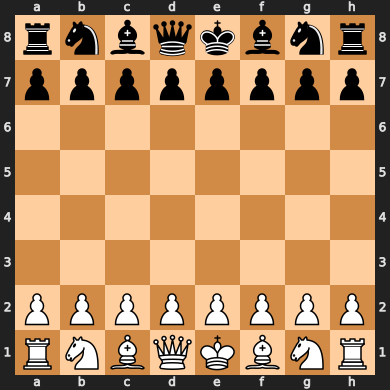

In [4]:
#print(games[2].board())
games[2].board()

In [5]:
board = games[3].board()
for move in games[3].mainline_moves():
    board.push(move)

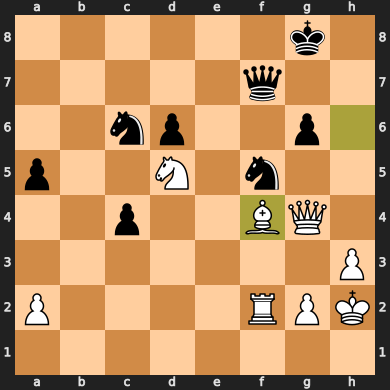

In [6]:
board

In [124]:
def to_uci(square):
    square = int(square)
    letter = chr(ord('a') + ((square)%8)) 
    number = square//8+1
    return f"{letter}{number}"

tracker  = games[100].board().piece_map()
moves = [(move.from_square, move.to_square) for move in games[100].mainline_moves()]
for key in tracker.keys():
    tracker[key] = {'piece': tracker[key].unicode_symbol()+'-'+str(to_uci(key)), 'moves':[], 'last_square':key, 'captured:':False, 'captures':[]}
tracker

{63: {'piece': '♜-h8',
  'moves': [],
  'last_square': 63,
  'captured:': False,
  'captures': []},
 62: {'piece': '♞-g8',
  'moves': [],
  'last_square': 62,
  'captured:': False,
  'captures': []},
 61: {'piece': '♝-f8',
  'moves': [],
  'last_square': 61,
  'captured:': False,
  'captures': []},
 60: {'piece': '♚-e8',
  'moves': [],
  'last_square': 60,
  'captured:': False,
  'captures': []},
 59: {'piece': '♛-d8',
  'moves': [],
  'last_square': 59,
  'captured:': False,
  'captures': []},
 58: {'piece': '♝-c8',
  'moves': [],
  'last_square': 58,
  'captured:': False,
  'captures': []},
 57: {'piece': '♞-b8',
  'moves': [],
  'last_square': 57,
  'captured:': False,
  'captures': []},
 56: {'piece': '♜-a8',
  'moves': [],
  'last_square': 56,
  'captured:': False,
  'captures': []},
 55: {'piece': '♟-h7',
  'moves': [],
  'last_square': 55,
  'captured:': False,
  'captures': []},
 54: {'piece': '♟-g7',
  'moves': [],
  'last_square': 54,
  'captured:': False,
  'captures': []},


The above is an example of how to track pieces across a game. This represents the begining of a game, keyed by square, with each piece identified individually by color, piece type, and starting position. 

In [120]:
games[1].headers

Headers(Event='Rated Blitz game', Site='https://lichess.org/b9tstv2z', Date='????.??.??', Round='?', White='dvorak', Black='Kiriush', Result='1-0', BlackElo='1876', BlackRatingDiff='-14', ECO='C55', Opening='Italian Game: Two Knights Defense, Perreux Variation', Termination='Normal', TimeControl='180+0', UTCDate='2013.01.31', UTCTime='23:03:05', WhiteElo='1796', WhiteRatingDiff='+13')

In [121]:
print(games[1].headers['Opening'])

Italian Game: Two Knights Defense, Perreux Variation


The game metadata is saved in a headers attribute in a game object, with all the metadata accesible via the header keys.  

In [11]:
white_rankings = [i.headers['WhiteElo'] for i in games]
openings = [i.headers['Opening'] for i in games] 
black_rankings = [i.headers['BlackElo'] for i in games]

In [12]:
white_rankings = [int(i) for i in white_rankings if i != '?']
black_rankings = [int(i) for i in black_rankings if i != '?']

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
sample_white, sample_black = map(list,zip(*sorted(zip(white_rankings, black_rankings), key=lambda x: x[0])))
sample_white = sample_white[::50]
sample_black = sample_black[::50]

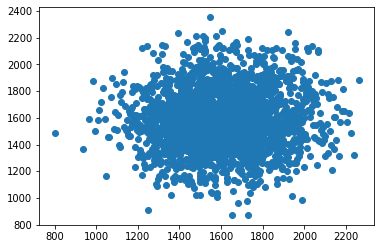

In [15]:
plt.scatter(sample_white, sample_black)

The above is a comparison of a small sample of rating pairings from our data for a given game, with the x-axis containing white and the y-axis black. 

(array([32363.,     0., 44525.,     0.,     0., 28438.,     0., 17108.,
            0.,  1527.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

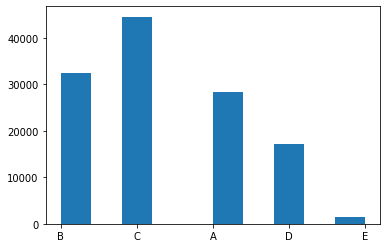

In [16]:
plt.close()
plt.hist(x=[i.headers['ECO'][0] for i in games])

The above is a breakdown of all openings by category. The data contains further specificty with two digits following each letter; for example: A00. See the following link for further details: https://en.wikipedia.org/wiki/List_of_chess_openings

![C openings broken out](screenshot_c_openings_chart.png)

The above was made using plotly. The chart shows the breakdown of open games and french defense opening by their specific subcategory. 

In [17]:
# who tends to win which opening

In [18]:
c00_games = [i for i in games if i.headers['ECO'] == 'C00' ]
white_result = [int(i.headers['Result'].split('-')[0]) for i in c00_games if i.headers['Result'].split('-')[0] != '1/2']
black_result = [int(i.headers['Result'].split('-')[1]) for i in c00_games if i.headers['Result'].split('-')[1] != '1/2']

In [19]:
sum_black = sum(black_result)
sum_white = sum(white_result)
total_games = len(c00_games)
draws = total_games - sum_black - sum_white
print(total_games, draws)

6142 205


In [20]:
print(f"There were {total_games} games played with the French Defense (C00) opening.")
print(f"Of those games, white won {sum_white} times, while black won {sum_black} times. There were {draws} draws.")

There were 6142 games played with the French Defense (C00) opening.
Of those games, white won 3166 times, while black won 2771 times. There were 205 draws.


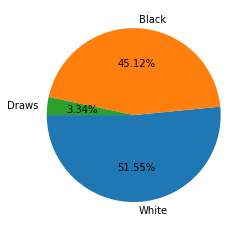

In [21]:
labels = 'White', 'Black', 'Draws'
sizes = [sum_white, sum_black, draws]
plt.pie(x=sizes, labels=labels, autopct='%1.2f%%', startangle=180)
plt.show()

## Potential applications of the data

This analysis will be used to create an analytically backed dashboard that can offer suggestions and insights based not only on pieces on the board, but on player statistics as well. 

## Data for further analysis

Lichess offers millions and millions of rated games played by people every day. With such a huge number of players, there are a lot of games that end abrubtly with no indication of either technical diffuclties or player choice. In addition, not every game is a shining example of chess. Further analysis is warranted on specifically high level tournament data, using our bulk data to generate useful insights to apply there. 

Specifically, we plan to compare the details of our analysis of Lichess internet games to an anlysis of professional games played by chess masters. 

The chess master games are downloaded from here: https://www.pgnmentor.com/files.html#players. The files are the same type as those downloaded from Lichess, and the features of the data are identical. 

## Data Dissemination and sharing

We plan to create interactive graphs breaking down games by different categories, such as opening, rating mismatch, and further combinations. 

Such interactive dashboards could be used by chess players to learn what their weaknesses are and how best to improve them. 

We plan to host the tools to utilize or reproduce the analysis online. 

## Limitations

The analysis of the data is limited by the complexity of the tools used; without a proper chess engine (such as Stockfish or Komodo), the evaluation of an individual move or opening in the context of the entire game may be lacking meaning that our data could be misleading in terms of any predictive capability.

Additionally, the PGN files are slow to parse and load into memory (at scale), limiting the potential breadth of our analysis without more powerful hardware. 